# **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load the dataset**

In [6]:
df = pd.read_csv('/content/drive/MyDrive/customer_segmentation.csv')
print("Dataset Loaded")


Dataset Loaded


# **Display the first few rows of the dataset**

In [7]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# **Set the style for the plots**

In [8]:
sns.set(style="whitegrid")

# **Visualize Age Distribution**

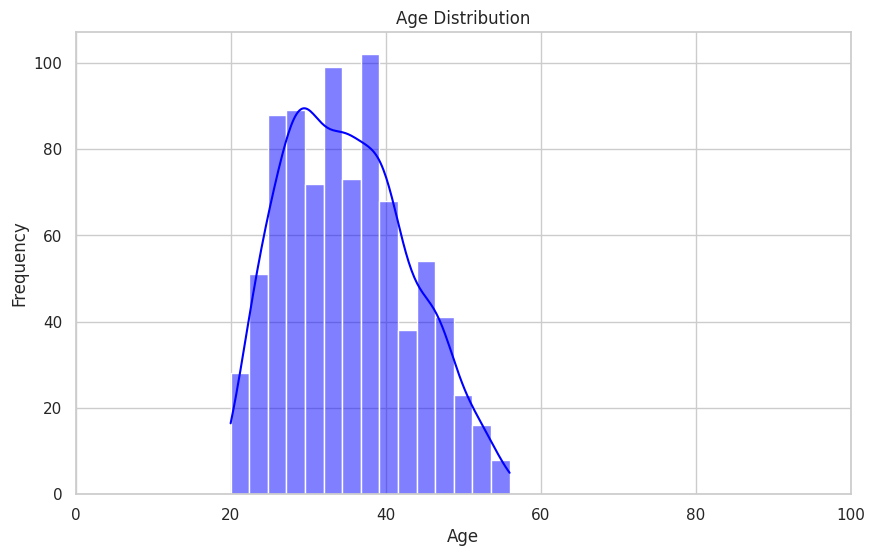

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()

# **Visualize Income Distribution**

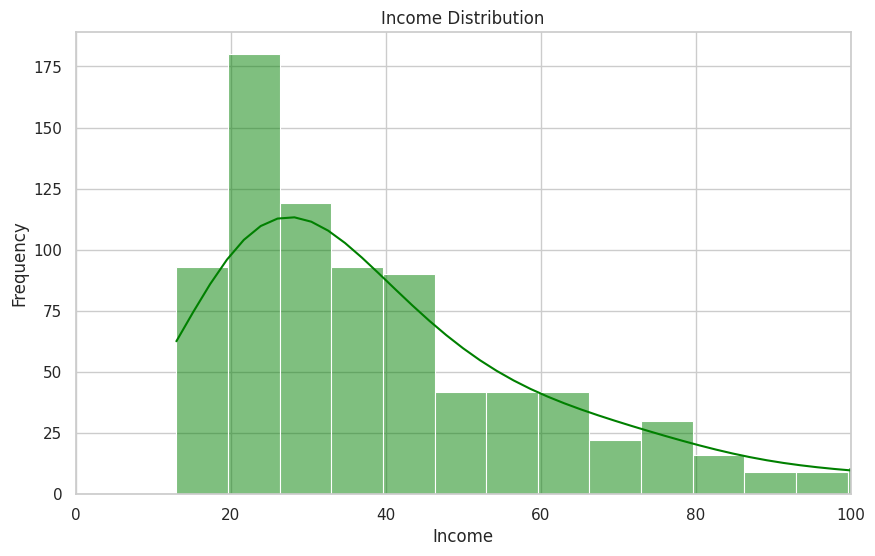

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color='green')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()

# **Visualize Years Employed Distribution**

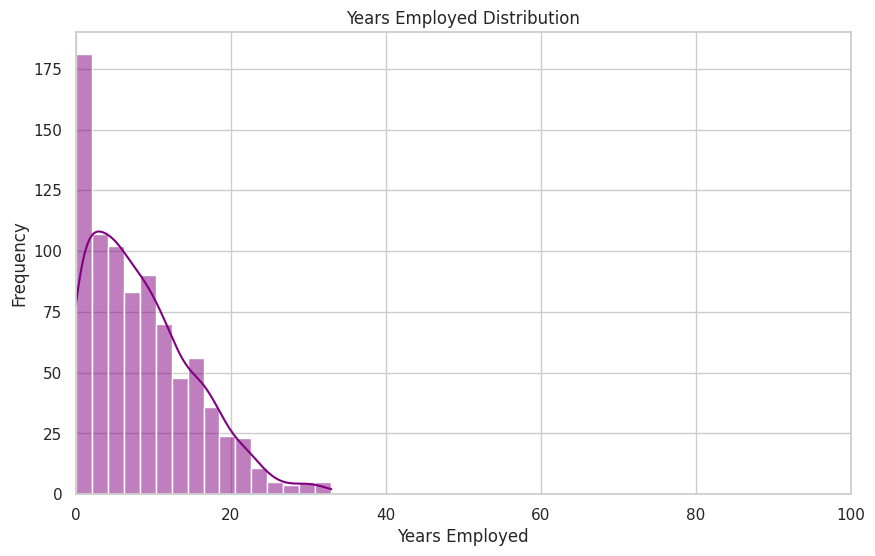

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Years Employed'], kde=True, color='purple')
plt.title('Years Employed Distribution')
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()

# **Visualize Card Debt Distribution**

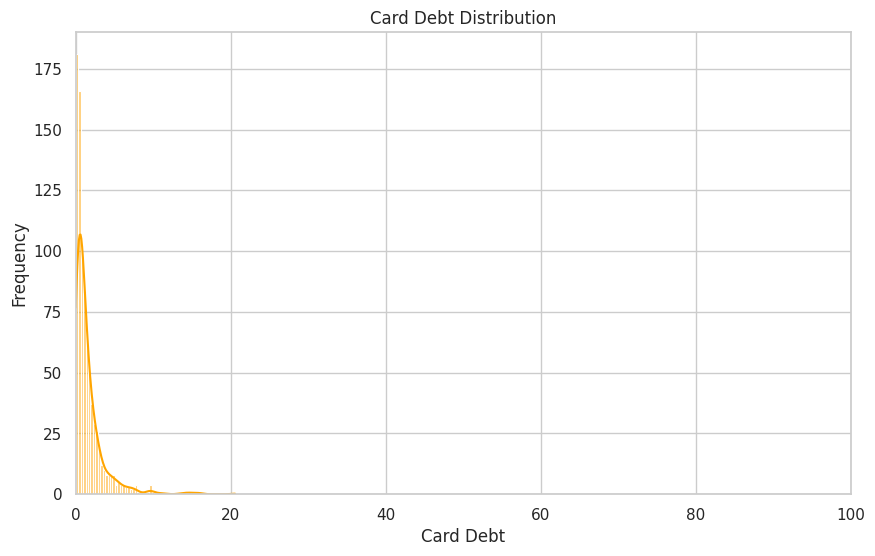

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Card Debt'], kde=True, color='orange')
plt.title('Card Debt Distribution')
plt.xlabel('Card Debt')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()

# **Visualize Other Debt Distribution**

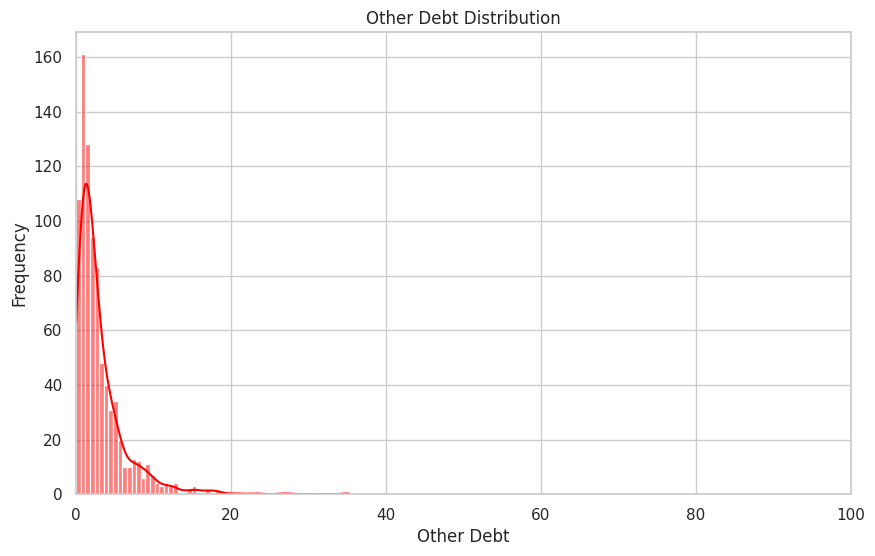

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Other Debt'], kde=True, color='red')
plt.title('Other Debt Distribution')
plt.xlabel('Other Debt')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()

# **Visualize Card Debt Distribution**

<ipython-input-14-32fd44e69881>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Defaulted', y='Income', data=df, palette='Set2')


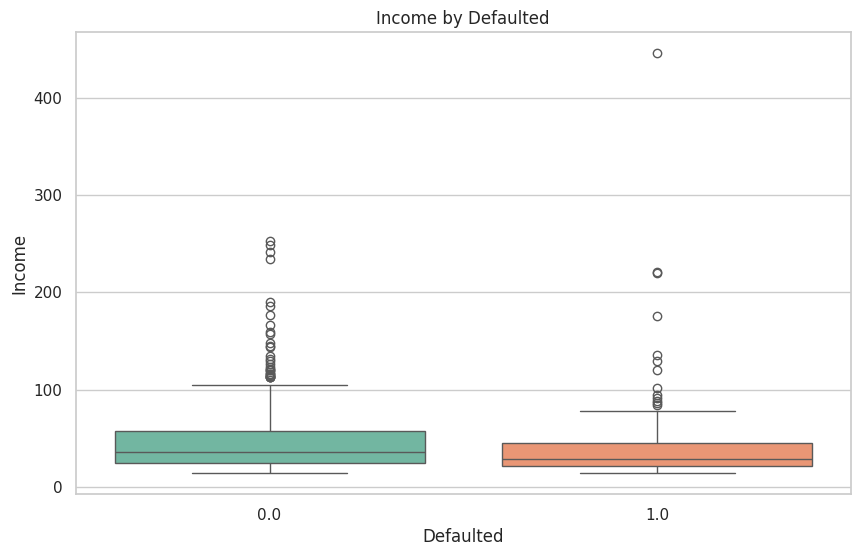

In [14]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Defaulted', y='Income', data=df, palette='Set2')
plt.title('Income by Defaulted')
plt.xlabel('Defaulted')
plt.ylabel('Income')
plt.show()



# **Visualize Defaulted Count**

<ipython-input-15-b785d646a4a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Defaulted', data=df, palette='Set2')


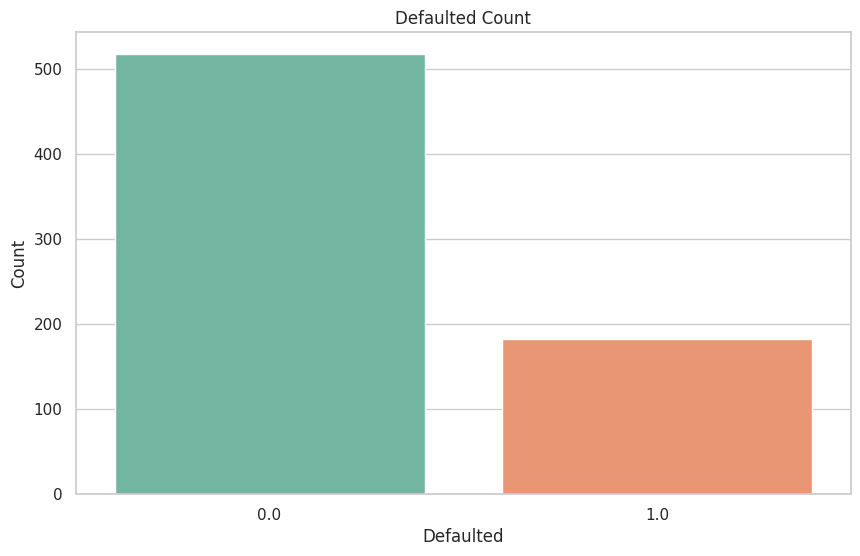

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Defaulted', data=df, palette='Set2')
plt.title('Defaulted Count')
plt.xlabel('Defaulted')
plt.ylabel('Count')
plt.show()


# **Visualize Education Level Distribution**

<ipython-input-16-f6d97538bb3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Edu', data=df, palette='Set3')


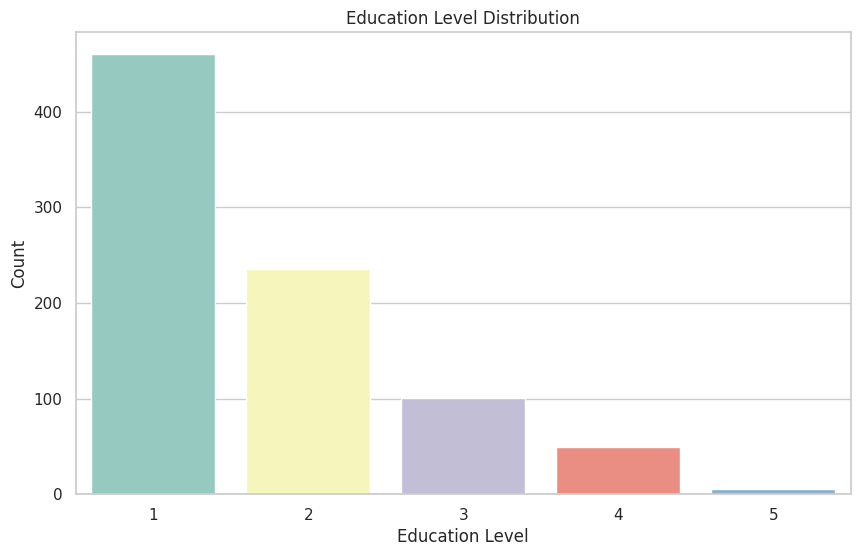

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Edu', data=df, palette='Set3')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


# **Visualize Income vs Age**

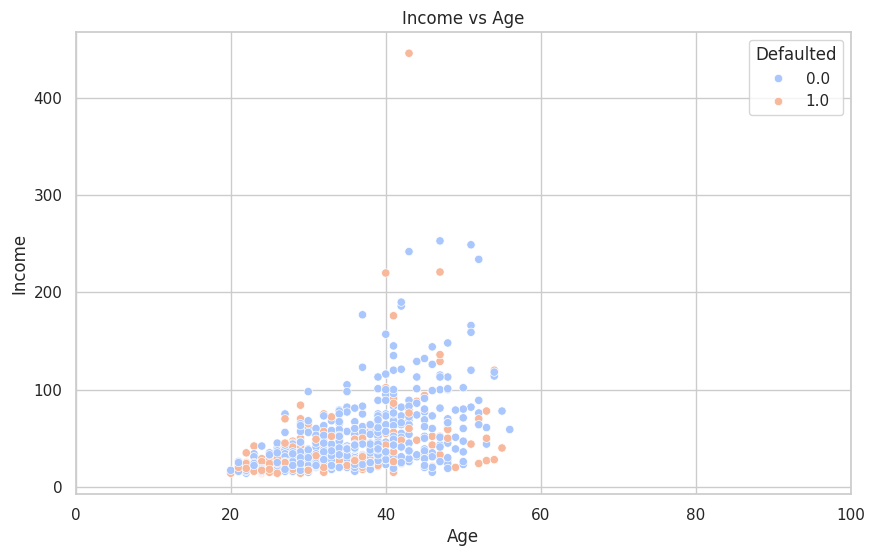

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df, hue='Defaulted', palette='coolwarm')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()

# **Visualize Card Debt vs Other Deb**

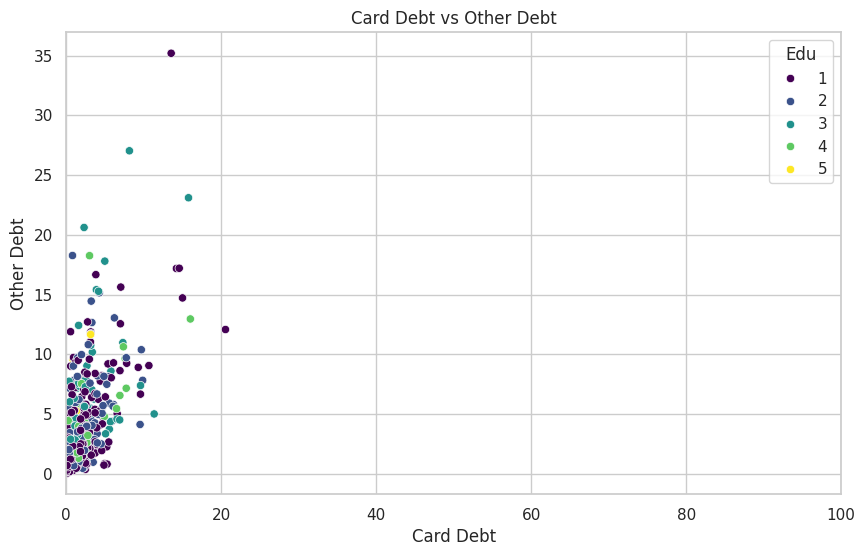

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Card Debt', y='Other Debt', data=df, hue='Edu', palette='viridis')
plt.title('Card Debt vs Other Debt')
plt.xlabel('Card Debt')
plt.ylabel('Other Debt')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()


# **Visualize Income vs Debt-Income Ratio**

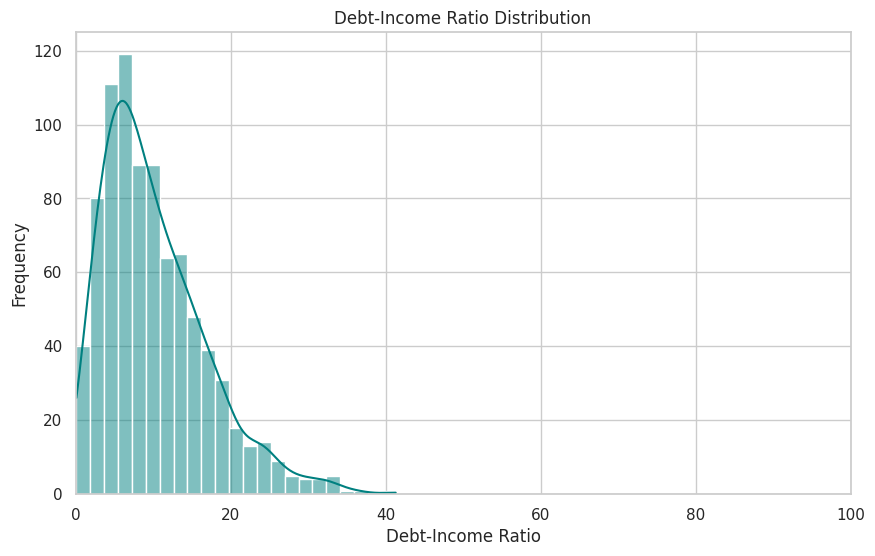

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DebtIncomeRatio'], kde=True, color='teal')
plt.title('Debt-Income Ratio Distribution')
plt.xlabel('Debt-Income Ratio')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.show()

# **Boxplot of Income by Defaulted status**

<ipython-input-20-b785d646a4a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Defaulted', data=df, palette='Set2')


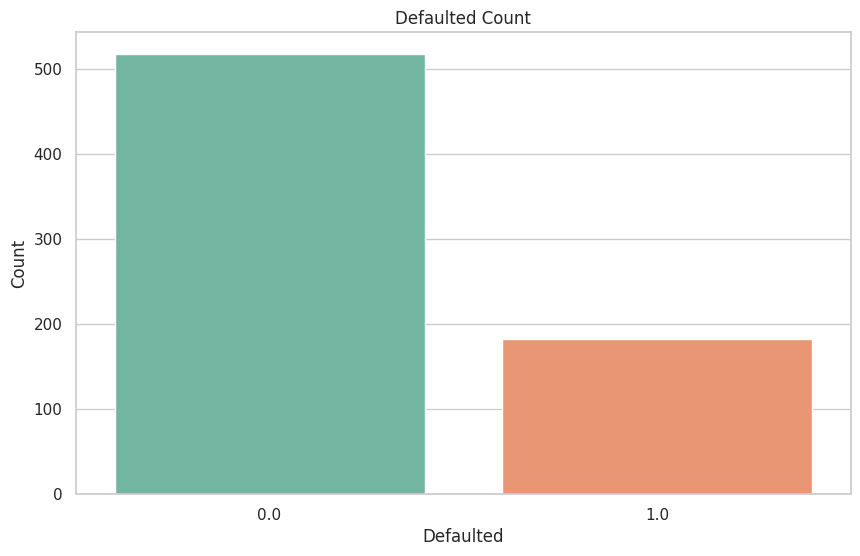

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Defaulted', data=df, palette='Set2')
plt.title('Defaulted Count')
plt.xlabel('Defaulted')
plt.ylabel('Count')
plt.show()

# **Boxplot of Card Debt by Education Level**

<ipython-input-21-f64326dcdfb5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Edu', y='Card Debt', data=df, palette='Set3')


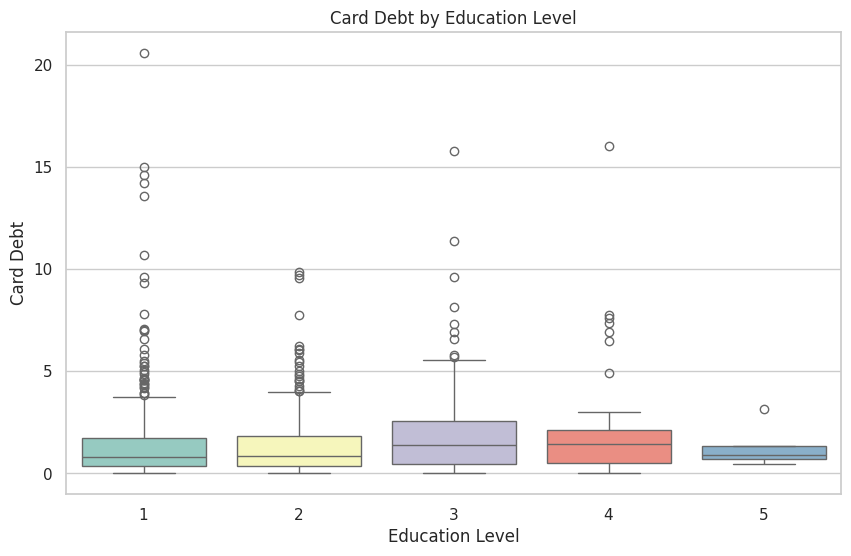

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Edu', y='Card Debt', data=df, palette='Set3')
plt.title('Card Debt by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Card Debt')
plt.show()

# **Boxplot of Other Debt by Defaulted status**

<ipython-input-22-3202a0a9c9f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Defaulted', y='Other Debt', data=df, palette='Set1')


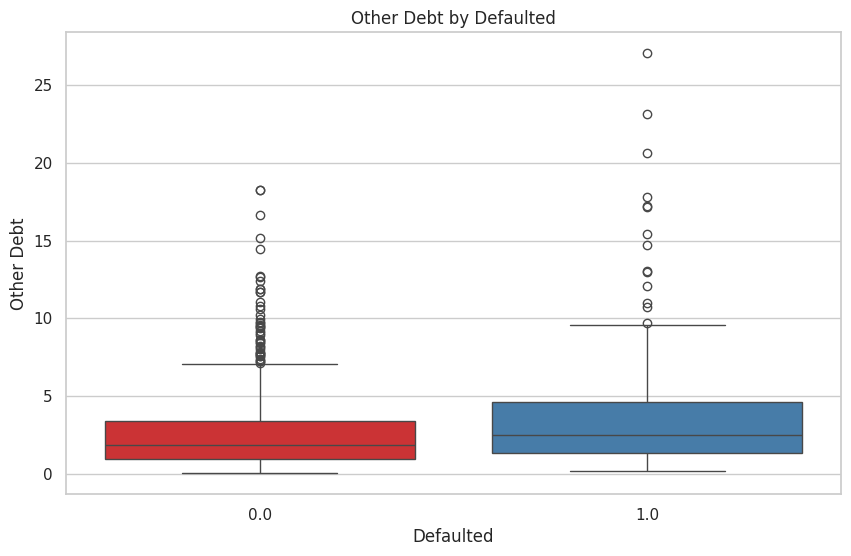

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Defaulted', y='Other Debt', data=df, palette='Set1')
plt.title('Other Debt by Defaulted')
plt.xlabel('Defaulted')
plt.ylabel('Other Debt')
plt.show()

# **Heatmap of Correlations between features**

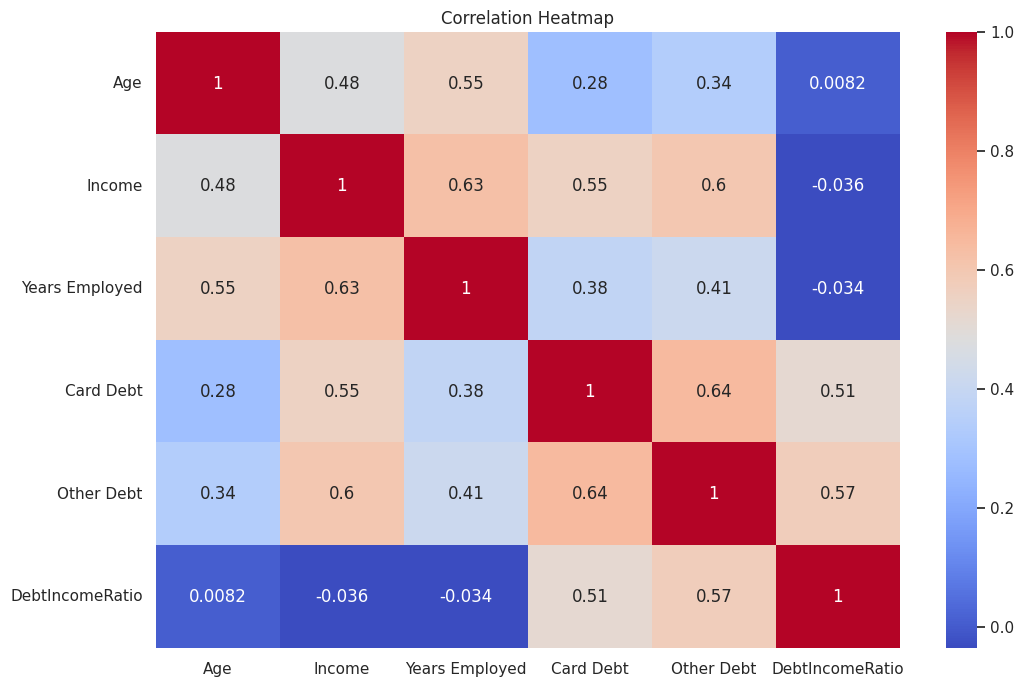

In [23]:
plt.figure(figsize=(12, 8))
corr = df[['Age', 'Income', 'Years Employed', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Drop the 'Address' column**

In [24]:
df = df.drop('Address', axis=1)

# **Normalize the dataset**

In [25]:
scaler = StandardScaler()
X = df.values[:, 1:]
X = np.nan_to_num(X)
scaled_dataset = scaler.fit_transform(X)
print("Dataset Normalized")

Dataset Normalized


# **Determine the optimal number of clusters using the Elbow Method**

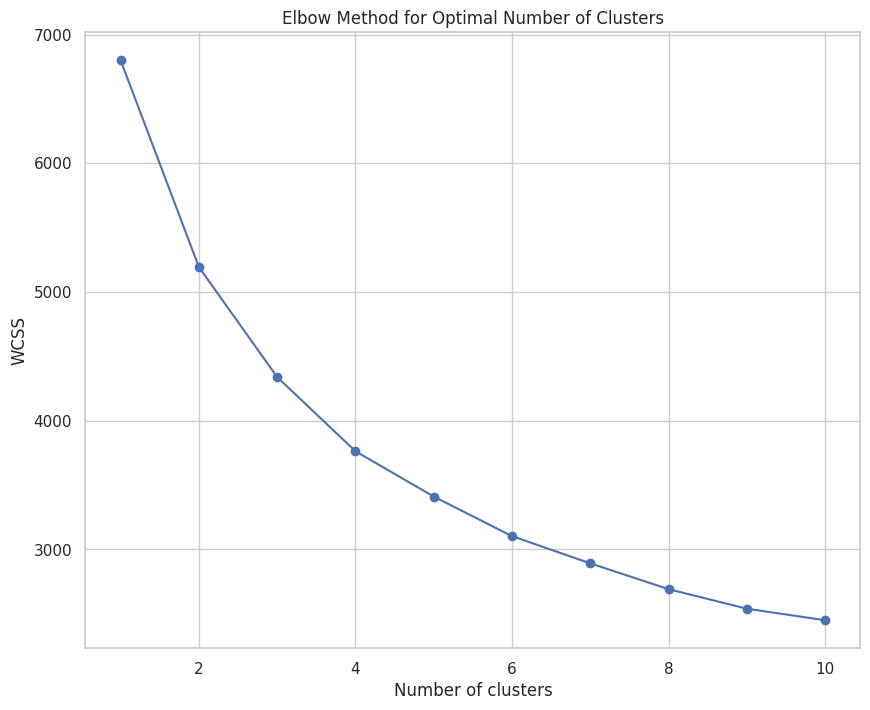

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=12)
    kmeans.fit(scaled_dataset)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# **Perform K-means clustering with the chosen number of clusters**

In [27]:
num_clusters = 3  # Assuming 3 clusters from the Elbow plot
k_means = KMeans(n_clusters=num_clusters, n_init=12)
k_means.fit(scaled_dataset)
labels = k_means.labels_

# **Add the cluster labels to the original dataframe**

In [28]:
num_clusters = 3
k_means = KMeans(n_clusters=num_clusters, n_init=12)
k_means.fit(scaled_dataset)
labels = k_means.labels_

# Add the cluster labels to the original dataframe
df["Cluster"] = labels
print("Cluster Labels Added")

Cluster Labels Added


# **Map descriptive cluster names**

In [30]:
cluster_names = {
    0: 'Young Low-Income Customers',
    1: 'High-Risk Customers',
    2: 'Wealthy Low-Risk Customers'
}
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# **Save the updated dataframe with cluster labels to a CSV file**

In [31]:
df.to_csv('customer_segmentation_with_clusters.csv', index=False)
print("Updated Dataset with Clusters Saved as customer_segmentation_with_clusters.csv")

Updated Dataset with Clusters Saved as customer_segmentation_with_clusters.csv


# **Optionally, visualize the clusters using PCA**

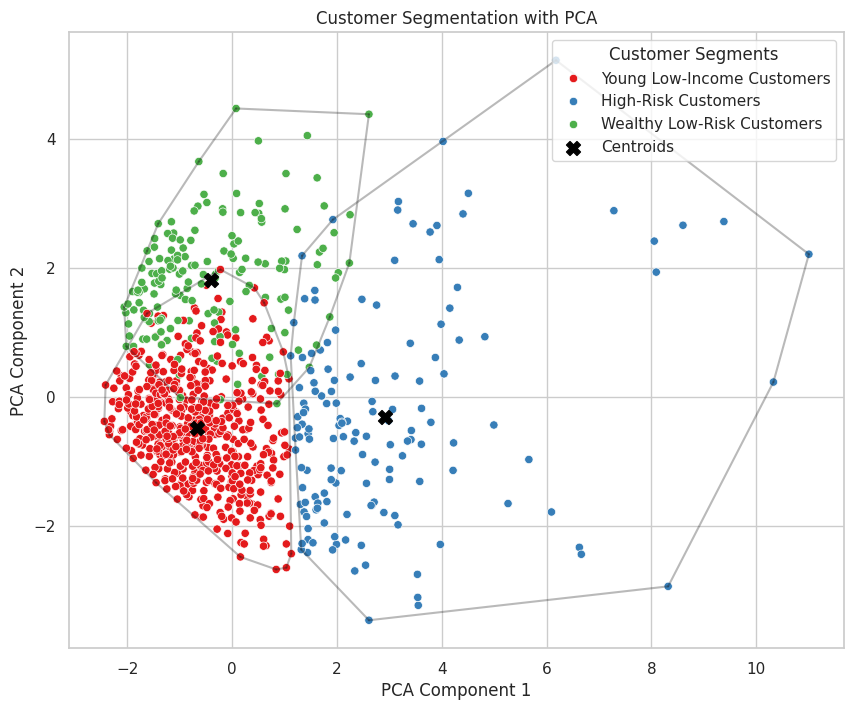

In [32]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_dataset)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster Name', data=df, palette='Set1')

# Calculate and plot centroids
centroids = df.groupby('Cluster Name')[['PCA1', 'PCA2']].mean().reset_index()
plt.scatter(centroids['PCA1'], centroids['PCA2'], s=100, c='black', marker='X', label='Centroids')

# Add flexible boundaries (convex hulls)
for cluster in df['Cluster Name'].unique():
    cluster_data = df[df['Cluster Name'] == cluster][['PCA1', 'PCA2']]
    if len(cluster_data) >= 3:  # Convex hull requires at least 3 points
        points = cluster_data.to_numpy()
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'k-', alpha=0.3)

plt.title("Customer Segmentation with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Customer Segments')
plt.show()

# **Visualize the distribution of the 'Cluster' column**

<ipython-input-33-dac2978b1008>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


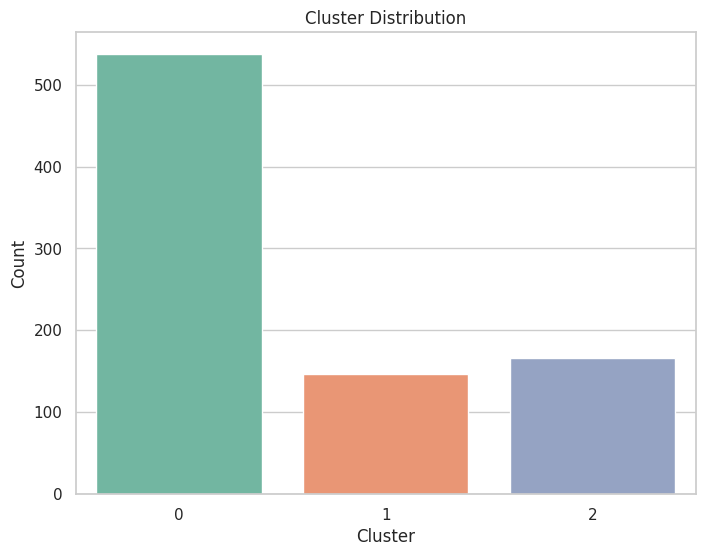

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# **Visualize feature distributions by cluster**

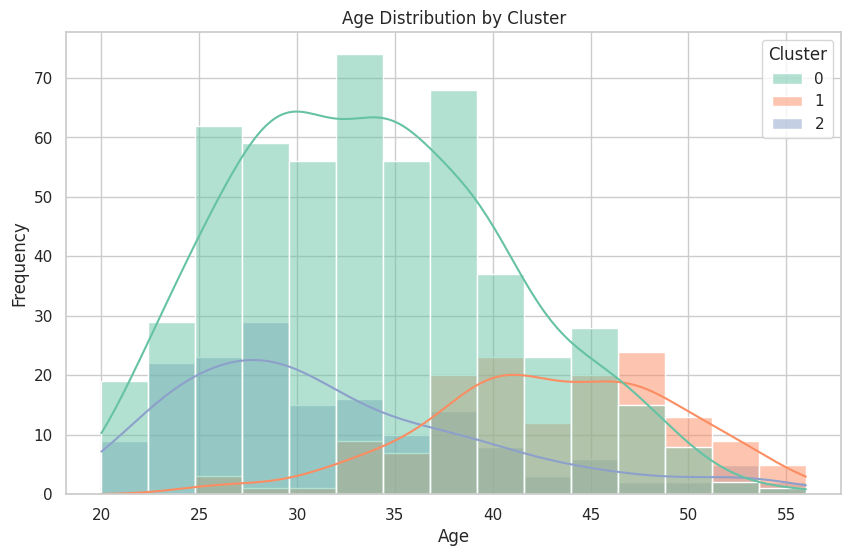

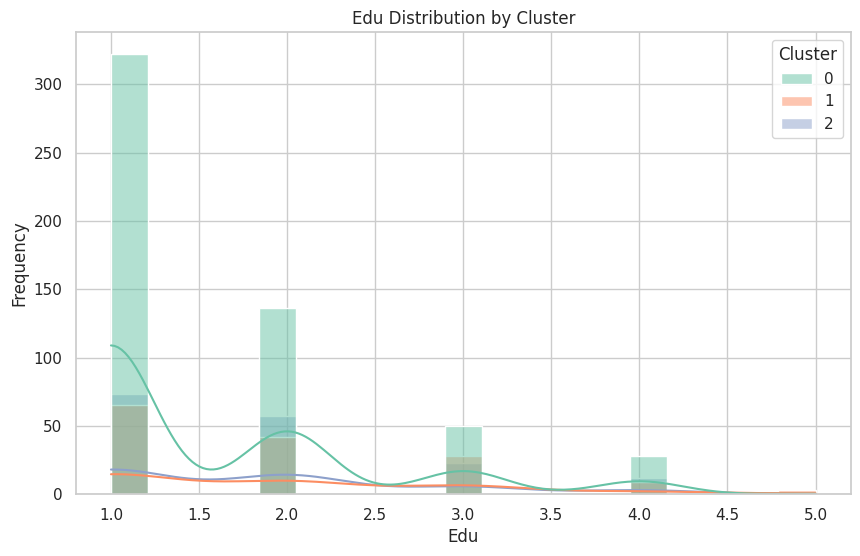

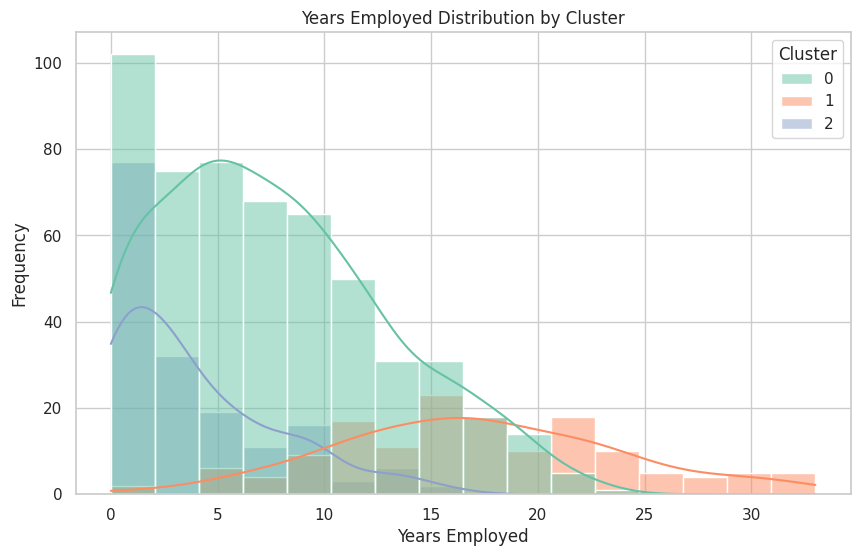

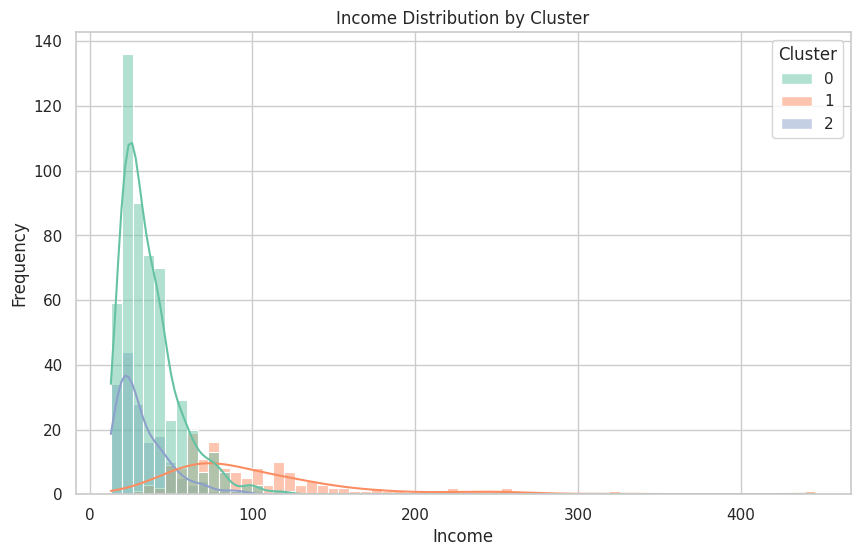

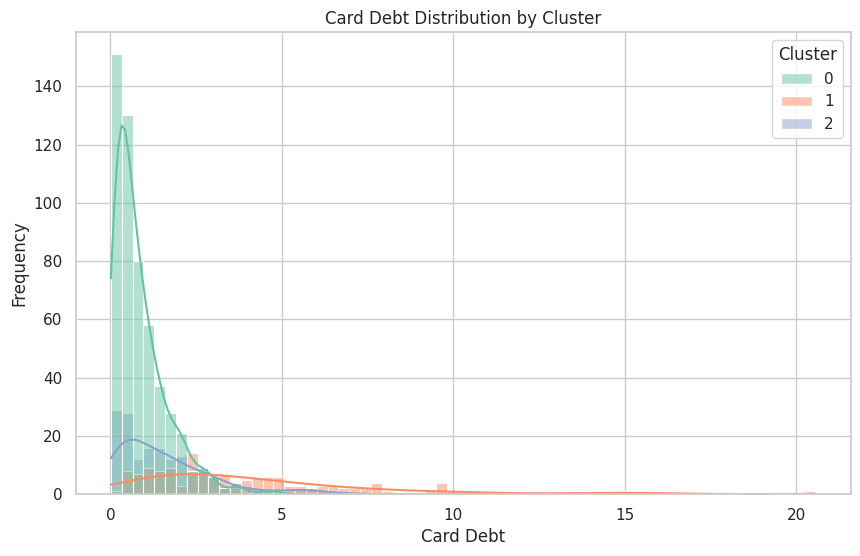

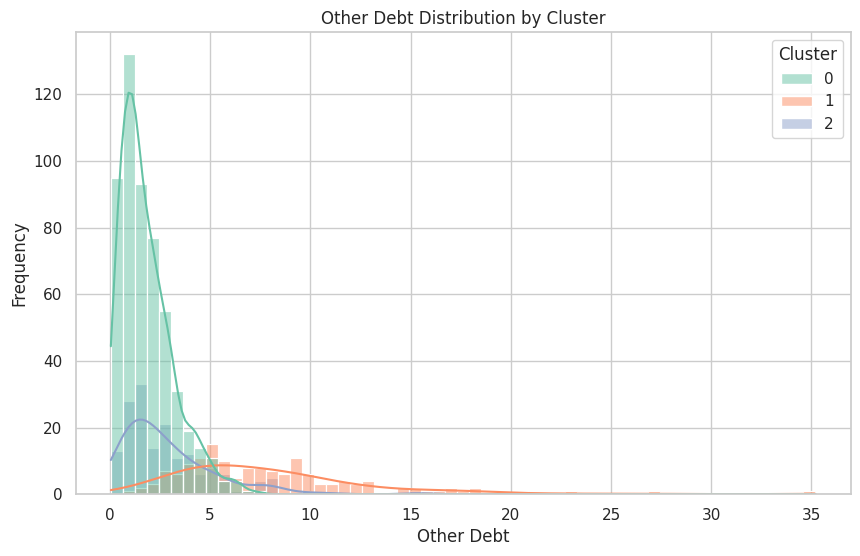

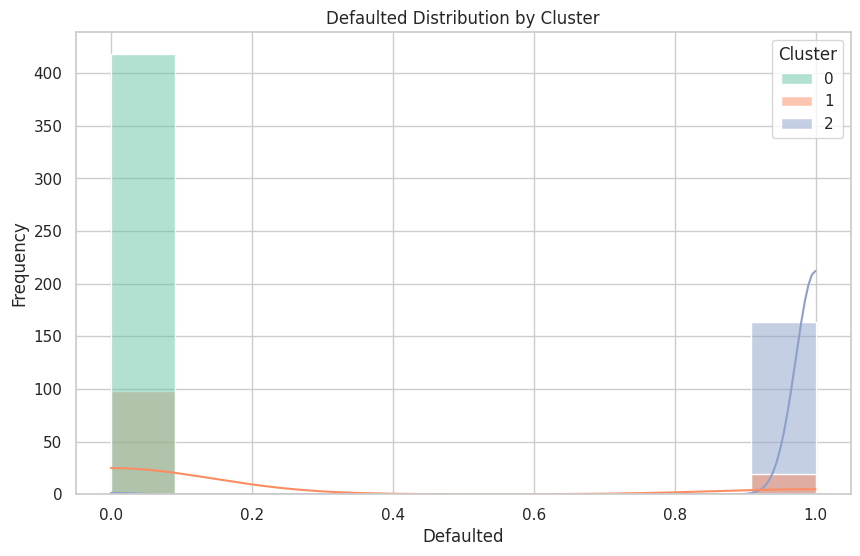

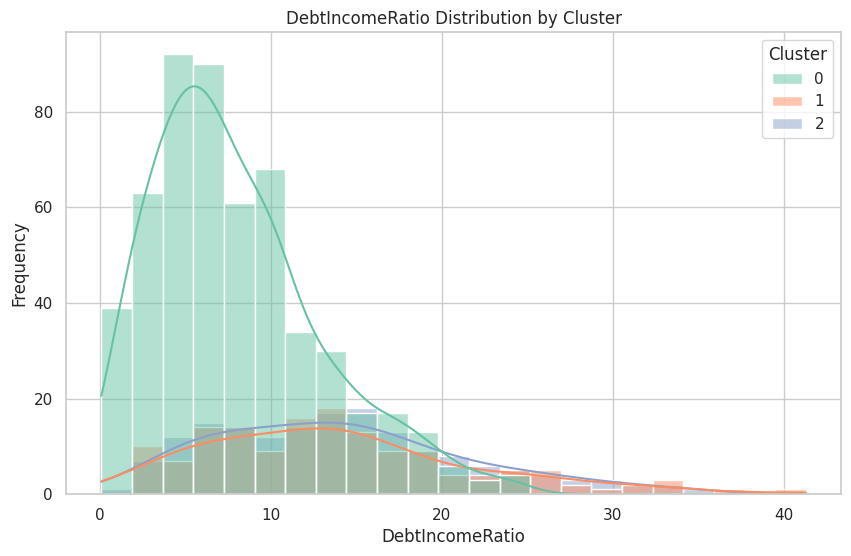

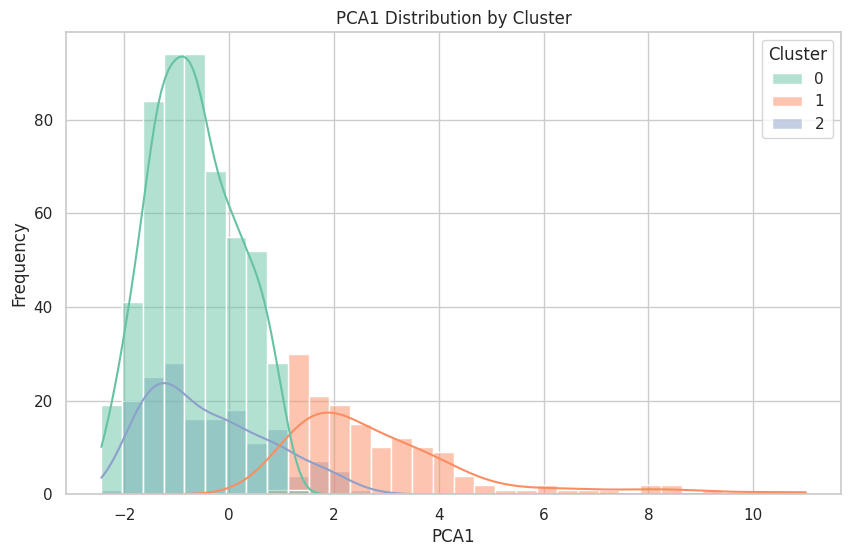

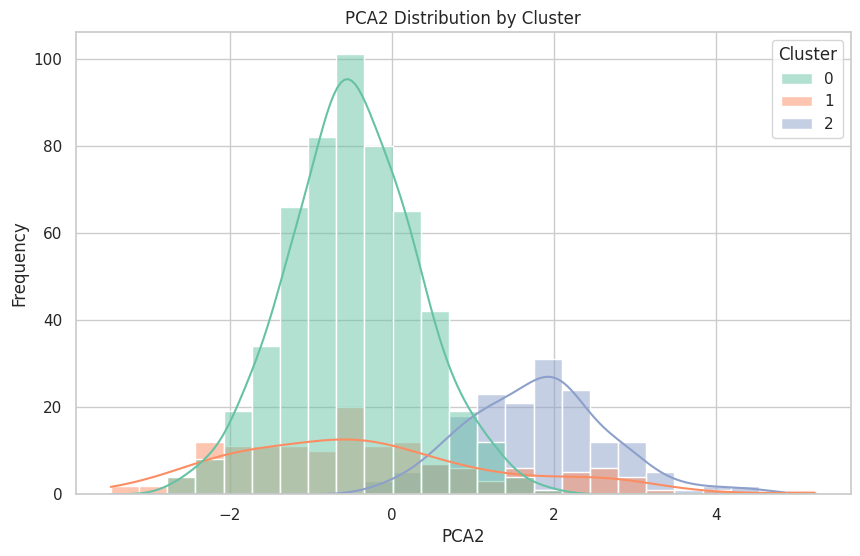

In [34]:
for feature in df.columns:
    if feature not in ['Customer Id', 'Cluster Name', 'Cluster']:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue='Cluster', kde=True, palette='Set2')
        plt.title(f'{feature} Distribution by Cluster')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

# Training the supervised machine leanring model to finds clusters for news users data

# **Data Preprocessing**

In [35]:
X = df.drop(['Cluster', 'Cluster Name', 'Customer Id'], axis=1)
y = df['Cluster']

# **Split the data into training and testing sets**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [37]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Make predictions on the test set**

In [38]:
y_pred = clf.predict(X_test)

# **Model Evaluation**

In [39]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       115
           1       0.96      1.00      0.98        26
           2       1.00      0.93      0.96        29

    accuracy                           0.99       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.99      0.99      0.99       170



Confusion Matrix:


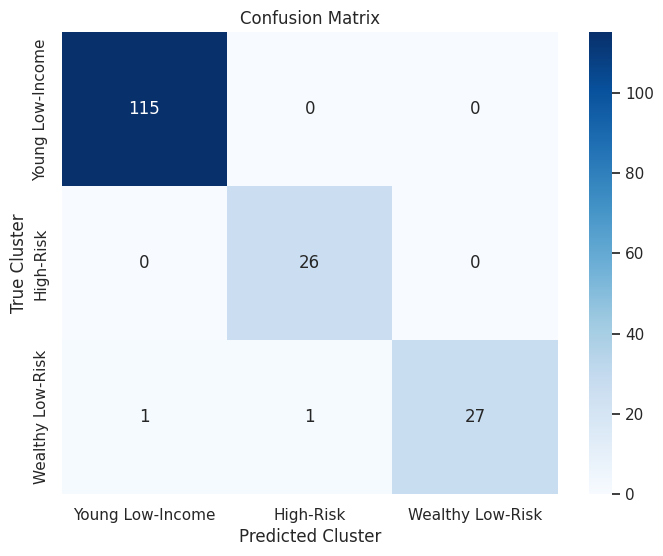

In [40]:
import matplotlib.pyplot as plt

print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))  # Remove this line

# Visualize Confusion Matrix with matplotlib"
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Young Low-Income', 'High-Risk', 'Wealthy Low-Risk'],
            yticklabels=['Young Low-Income', 'High-Risk', 'Wealthy Low-Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Cluster')
plt.show()


# **Calculate and print the accuracy score**

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.99


# **Save the trained model using joblib**

In [42]:
model_filename = 'customer_segmentation_model.joblib'
joblib.dump(clf, model_filename)
print(f'Model saved as {model_filename}')

Model saved as customer_segmentation_model.joblib
